In [1]:
# block 1: import of all useful libraries and the data file used
%reset
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 
import datetime as dt
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
# block 2: creation of different variables uses 
# Assignment for each variable of data coming from the file import (data of the type ndarrays)
data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                                          
meander = data['M']
jetspeed = data['Q']

In [11]:
# block 3: Conversion of Matlab time data to 'classic python time data.
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                         
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac

In [12]:
# block 4: Creation of time and power variables
t = data_t[0,:]
py_t = [matlab2datetime(tval) for tval in t]
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 *(Vf*Vf*Vf)    
Pf = P/1000

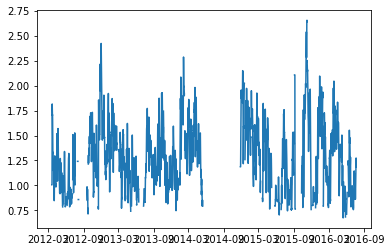

In [13]:
plt.plot(py_t,-jetspeed)

In [14]:
#creat power density with the jetspeed
P_jet = 0.5 * 1025 *(jetspeed**3)    
P_jet_final = P_jet/1000

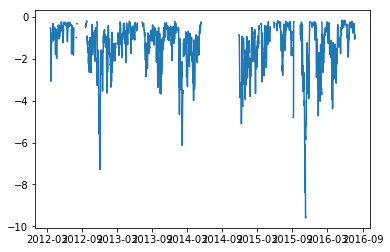

In [15]:
plt.plot(py_t,P_jet_final)

In [19]:
#creation de la moyenne
#Power
Pjet_meanf = np.nanmean(P_jet_final)
Pjet_meanf = np.full((12808, ),  1.3775555602729608)
#Speed 
jetspeed_mean = np.nanmean(jetspeed)
jetspeed_mean = np.full((12808, ),  1.3063161216434556)
#meandering
meander_mean = np.nanmean(meander[0,:])
meander_meanf = np.full((12808, ), 153.6302753989115)

In [20]:
#Part 2: calculer le power moyen pour 153.63 long (moyenne de position du core).


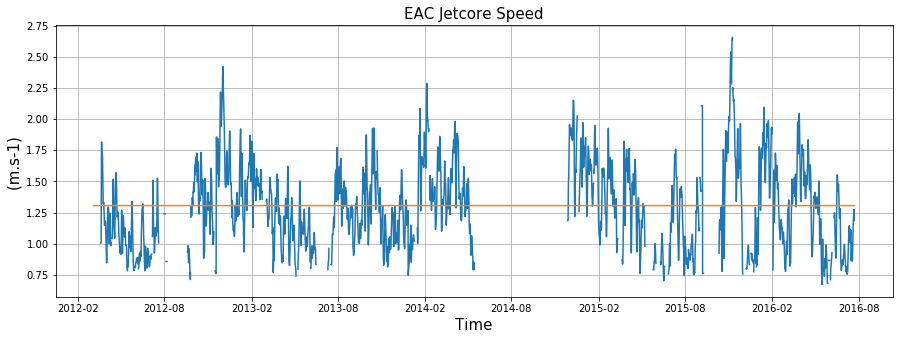

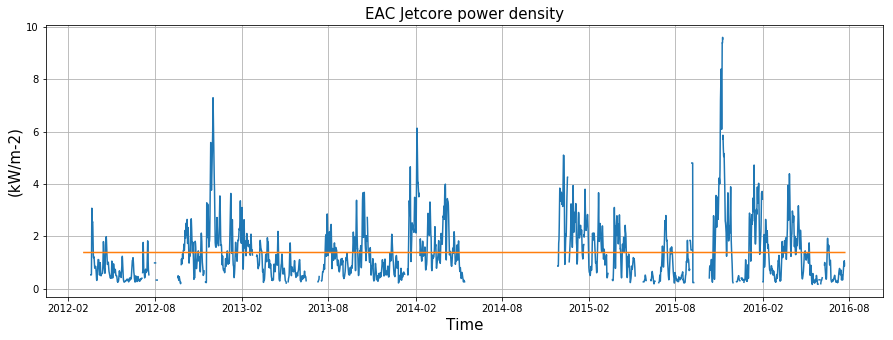

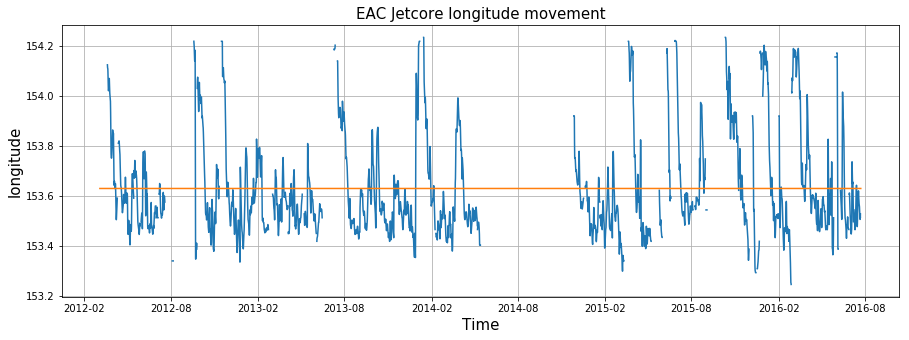

In [21]:
#figure final Power density et speed  for the jetcore

#Speed
plt.figure(figsize=(15,5))
plt.plot(py_t,-jetspeed, label="Speed vs time")
plt.plot(py_t,jetspeed_mean,label="Speed mean(-1.30 m.s-1)")
plt.xlabel("Time",fontsize=15)                                                     
plt.ylabel("(m.s-1) ",fontsize=15)                      
plt.title("EAC Jetcore Speed",fontsize=15)      
plt.grid(True)                       
plt.show()

#Power density
plt.figure(figsize=(15,5))
plt.plot(py_t,-P_jet_final, label="Power density vs time")
plt.plot(py_t,Pjet_meanf,label="Power density mean (1.37kW/m-2)")
plt.xlabel("Time",fontsize=15)                                                     
plt.ylabel("(kW/m-2)",fontsize=15)                      
plt.title("EAC Jetcore power density",fontsize=15)      
plt.grid(True)                       
plt.show()

#meandering
plt.figure(figsize=(15,5))
plt.plot(py_t,meander[0,:], label="longitude position of the EAC vs time")
plt.plot(py_t,meander_meanf,label="mean longitude position of the EAC")
plt.xlabel("Time",fontsize=15)                                                     
plt.ylabel("longitude",fontsize=15)                      
plt.title("EAC Jetcore longitude movement",fontsize=15)      
plt.grid(True)                       
plt.show()